In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('Mall_Customers.csv')
print("The shape of data is",df.shape)
df.head()

The shape of data is (200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# Step 1: Identify and remove null/missing values
missing_values = df.isnull().sum()
data_cleaned = df.dropna()

In [ ]:
# Step 2: Detect and eliminate duplicate entries
duplicate_entries = data_cleaned.duplicated().sum()
data_cleaned = data_cleaned.drop_duplicates()

In [ ]:
# Step 3: Drop unnecessary columns (CustomerID column)
data_cleaned = data_cleaned.drop(columns=['CustomerID'])

In [ ]:
# Step 4: Identify and manage outliers using IQR method
Q1 = data_cleaned[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].quantile(0.25)
Q3 = data_cleaned[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
# Identify outliers
outliers = ((data_cleaned[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] < (Q1 - 1.5 * IQR)) |
            (data_cleaned[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] > (Q3 + 1.5 * IQR)))

In [ ]:
# Filter out outliers
data_cleaned_no_outliers = data_cleaned[~outliers.any(axis=1)]
# Show the cleaned data
data_cleaned_no_outliers.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [ ]:
X=data_cleaned_no_outliers[['Annual Income (k$)', 'Spending Score (1-100)']]

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [ ]:
wcss

[256064.40909090906,
 172224.54136986312,
 101166.23927650377,
 68698.51117686444,
 39345.277077327715,
 33863.22519762847,
 28784.98971275709,
 26596.61126769688,
 24094.301939520483,
 18003.296304661533,
 15909.500527274764,
 14754.858490924285,
 13852.856580510985,
 13577.22838614874,
 12799.920507915047,
 10543.37011786314,
 10359.647517760017,
 9478.33335577466,
 8127.479420820728,
 8561.86913388544]

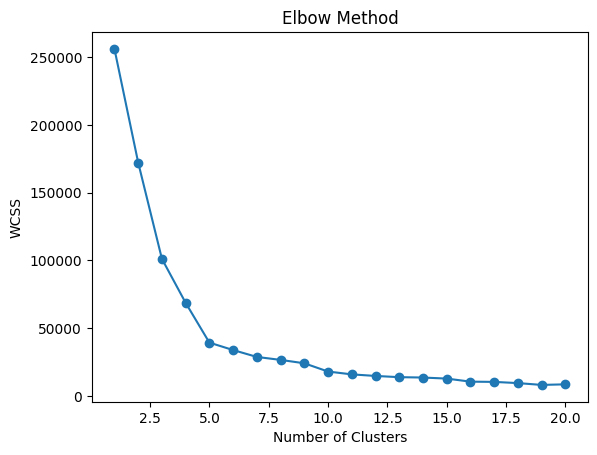

In [ ]:
plt.plot(range(1, 21), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
km = KMeans(n_clusters=5)
y_means = km.fit_predict(X)

ValueError: could not convert string to float: 'Male'

The shape of data is (200, 5)


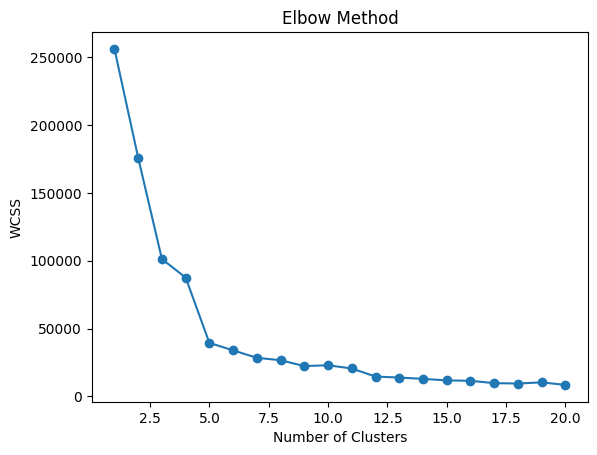

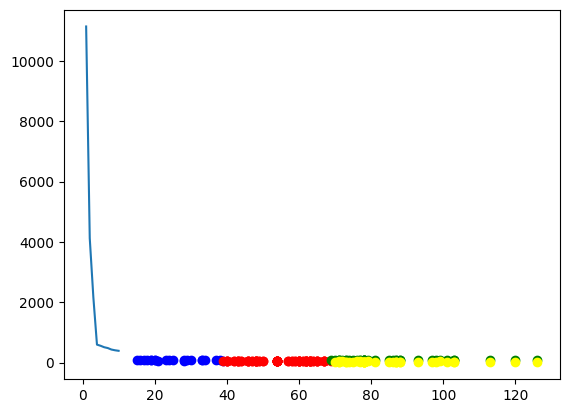

In [ ]:
# %%
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import plotly.express as px
# %%
df = pd.read_csv('Mall_Customers.csv')
print("The shape of data is",df.shape)
df.head()
# %%
# Step 1: Identify and remove null/missing values
missing_values = df.isnull().sum()
data_cleaned = df.dropna()
# %%
# Step 2: Detect and eliminate duplicate entries
duplicate_entries = data_cleaned.duplicated().sum()
data_cleaned = data_cleaned.drop_duplicates()
# %%
# Step 3: Drop unnecessary columns (CustomerID column)
data_cleaned = data_cleaned.drop(columns=['CustomerID'])
# %%
# Step 4: Identify and manage outliers using IQR method
Q1 = data_cleaned[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].quantile(0.25)
Q3 = data_cleaned[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].quantile(0.75)
IQR = Q3 - Q1
# %%
# Identify outliers
outliers = ((data_cleaned[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] < (Q1 - 1.5 * IQR)) |
            (data_cleaned[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] > (Q3 + 1.5 * IQR)))
# %%
# Filter out outliers
data_cleaned_no_outliers = data_cleaned[~outliers.any(axis=1)]
# Show the cleaned data
data_cleaned_no_outliers.head()
# %%
X=data_cleaned_no_outliers[['Annual Income (k$)', 'Spending Score (1-100)']]
# %%
wcss = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
# %%
plt.plot(range(1, 21), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()
# %%
km = KMeans(n_clusters=5)
y_means = km.fit_predict(X)
# %%
plt.scatter(X[y_means == 0]['Annual Income (k$)'], X[y_means == 0]['Spending Score (1-100)'],color='blue')
plt.scatter(X[y_means == 1]['Annual Income (k$)'], X[y_means == 1]['Spending Score (1-100)'],color='red')
plt.scatter(X[y_means == 2]['Annual Income (k$)'], X[y_means == 2]['Spending Score (1-100)'],color='green')
plt.scatter(X[y_means == 3]['Annual Income (k$)'], X[y_means == 3]['Spending Score (1-100)'],color='yellow')
# %% [markdown]
# # K-Means on 3-D Data
# %%
centroids = [(-5,-5,5),(5,5,-5),(3.5,-2.5,4),(-2.5,2.5,-4)]
cluster_std = [1,1,1,1]

X_3d,y = make_blobs(n_samples=200,cluster_std=cluster_std,centers=centroids,n_features=3,random_state=1) #renamed X to X_3d here
# %%
import plotly.express as px
fig = px.scatter_3d(x=X_3d[:,0], y=X_3d[:,1], z=X_3d[:,2]) # used X_3d instead of X here
fig.show()
# %%
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(X_3d) # used X_3d instead of X here
    wcss.append(km.inertia_)
# %%
plt.plot(range(1,11),wcss)
# %%
km = KMeans(n_clusters=4)
y_pred = km.fit_predict(X_3d) # used X_3d instead of X here
# %%
df = pd.DataFrame()

df['col1'] = X_3d[:,0] # used X_3d instead of X here
df['col2'] = X_3d[:,1] # used X_3d instead of X here
df['col3'] = X_3d[:,2] # used X_3d instead of X here
df['label'] = y_pred
# %%
fig = px.scatter_3d(df,x='col1', y='col2', z='col3',color='label')
fig.show()

In [ ]:
y_means

array([2, 3, 1, 1, 3, 3, 1, 0, 3, 1, 2, 3, 1, 2, 3, 1, 3, 1, 3, 3, 1, 2,
       1, 2, 2, 1, 2, 0, 1, 3, 0, 3, 0, 3, 1, 1, 0, 3, 2, 3, 2, 1, 1, 2,
       0, 0, 1, 3, 0, 3, 2, 2, 0, 1, 0, 3, 3, 0, 3, 0, 3, 1, 1, 0, 2, 0,
       1, 2, 3, 1, 3, 0, 1, 2, 3, 0, 3, 0, 2, 1, 1, 0, 3, 2, 0, 2, 0, 3,
       0, 3, 0, 0, 1, 2, 1, 1, 0, 1, 2, 0, 3, 2, 2, 0, 2, 2, 1, 2, 0, 0,
       1, 0, 3, 3, 1, 0, 1, 3, 0, 2, 2, 3, 1, 0, 1, 2, 1, 3, 2, 1, 1, 3,
       2, 2, 3, 0, 3, 2, 1, 1, 1, 2, 3, 2, 2, 0, 2, 0, 3, 2, 0, 2, 0, 0,
       2, 1, 3, 0, 3, 1, 2, 0, 3, 1, 0, 2, 3, 2, 2, 0, 0, 3, 0, 2, 2, 1,
       0, 3, 2, 0, 0, 3, 3, 3, 1, 2, 1, 1, 0, 3, 1, 1, 2, 2, 1, 2, 0, 3,
       3, 0], dtype=int32)

In [ ]:
X[y_means == 1]

array([[  8.36,  93.  ],
       [  8.27,  97.  ],
       [  8.41,  98.  ],
       [  8.09,  94.  ],
       [  8.16,  97.  ],
       [  8.31,  95.  ],
       [  7.87,  91.  ],
       [  7.47,  98.  ],
       [  7.78,  92.  ],
       [  7.93,  98.  ],
       [  8.04,  94.  ],
       [  7.77,  96.  ],
       [  8.  ,  96.  ],
       [  8.43,  96.  ],
       [  8.02,  93.  ],
       [  8.14,  94.  ],
       [  8.12,  96.  ],
       [  8.34,  96.  ],
       [  8.65,  95.  ],
       [  8.53,  93.  ],
       [  8.29,  95.  ],
       [  7.93,  94.  ],
       [  8.72,  92.  ],
       [  8.14,  91.  ],
       [  8.2 ,  92.  ],
       [  8.67,  95.  ],
       [  8.18,  94.  ],
       [  8.61,  95.  ],
       [  7.99,  92.  ],
       [  8.08,  94.  ],
       [  8.26,  91.  ],
       [  8.25,  95.  ],
       [  8.4 ,  93.  ],
       [  7.84,  97.  ],
       [  8.08,  98.  ],
       [  8.25,  96.  ],
       [  8.3 ,  93.  ],
       [  7.9 , 100.  ],
       [  7.97,  96.  ],
       [  8.21,  94.  ],


In [ ]:
X[y_means == 2]

array([[ 5.13, 88.  ],
       [ 4.6 , 86.  ],
       [ 5.  , 88.  ],
       [ 4.86, 86.  ],
       [ 4.78, 87.  ],
       [ 4.96, 88.  ],
       [ 4.86, 87.  ],
       [ 5.44, 84.  ],
       [ 5.34, 85.  ],
       [ 5.31, 86.  ],
       [ 5.14, 83.  ],
       [ 4.95, 86.  ],
       [ 5.21, 87.  ],
       [ 4.91, 85.  ],
       [ 5.28, 83.  ],
       [ 5.15, 88.  ],
       [ 4.9 , 85.  ],
       [ 4.89, 88.  ],
       [ 5.05, 86.  ],
       [ 4.98, 91.  ],
       [ 5.01, 86.  ],
       [ 4.95, 88.  ],
       [ 4.96, 89.  ],
       [ 4.85, 86.  ],
       [ 4.76, 90.  ],
       [ 4.98, 87.  ],
       [ 4.78, 87.  ],
       [ 5.2 , 85.  ],
       [ 5.05, 87.  ],
       [ 5.01, 83.  ],
       [ 4.77, 86.  ],
       [ 4.68, 87.  ],
       [ 4.81, 85.  ],
       [ 5.03, 87.  ],
       [ 4.98, 87.  ],
       [ 5.32, 88.  ],
       [ 4.86, 88.  ],
       [ 4.89, 85.  ],
       [ 4.88, 86.  ],
       [ 5.01, 86.  ],
       [ 4.67, 86.  ],
       [ 5.15, 85.  ],
       [ 4.97, 88.  ],
       [ 4.

In [ ]:
X[y_means == 3]

array([[  5.9 , 113.  ],
       [  5.45, 110.  ],
       [  5.88, 109.  ],
       [  5.79, 110.  ],
       [  6.1 , 110.  ],
       [  5.71, 108.  ],
       [  5.5 , 111.  ],
       [  6.05, 111.  ],
       [  5.84, 113.  ],
       [  5.43, 106.  ],
       [  6.01, 112.  ],
       [  5.32, 106.  ],
       [  5.91, 108.  ],
       [  5.57, 113.  ],
       [  6.4 , 108.  ],
       [  5.67, 109.  ],
       [  6.05, 108.  ],
       [  5.85, 111.  ],
       [  5.87, 109.  ],
       [  6.02, 104.  ],
       [  5.77, 111.  ],
       [  6.06, 109.  ],
       [  5.55, 109.  ],
       [  5.81, 112.  ],
       [  5.47, 111.  ],
       [  5.74, 109.  ],
       [  5.8 , 108.  ],
       [  5.88, 110.  ],
       [  5.91, 109.  ],
       [  5.67, 111.  ],
       [  5.74, 108.  ],
       [  5.69, 109.  ],
       [  6.05, 109.  ],
       [  6.14, 111.  ],
       [  5.74, 112.  ],
       [  5.94, 109.  ],
       [  5.86, 111.  ],
       [  6.38, 107.  ],
       [  6.61, 111.  ],
       [  6.04, 110.  ],


In [ ]:
X[y_means == 3,0]

array([5.9 , 5.45, 5.88, 5.79, 6.1 , 5.71, 5.5 , 6.05, 5.84, 5.43, 6.01,
       5.32, 5.91, 5.57, 6.4 , 5.67, 6.05, 5.85, 5.87, 6.02, 5.77, 6.06,
       5.55, 5.81, 5.47, 5.74, 5.8 , 5.88, 5.91, 5.67, 5.74, 5.69, 6.05,
       6.14, 5.74, 5.94, 5.86, 6.38, 6.61, 6.04, 6.24, 6.1 , 5.8 , 5.87,
       5.97, 6.17, 6.01, 6.33, 5.85, 6.23])

In [ ]:
X[y_means == 3,1]

array([113., 110., 109., 110., 110., 108., 111., 111., 113., 106., 112.,
       106., 108., 113., 108., 109., 108., 111., 109., 104., 111., 109.,
       109., 112., 111., 109., 108., 110., 109., 111., 108., 109., 109.,
       111., 112., 109., 111., 107., 111., 110., 108., 109., 110., 108.,
       108., 110., 107., 111., 112., 108.])

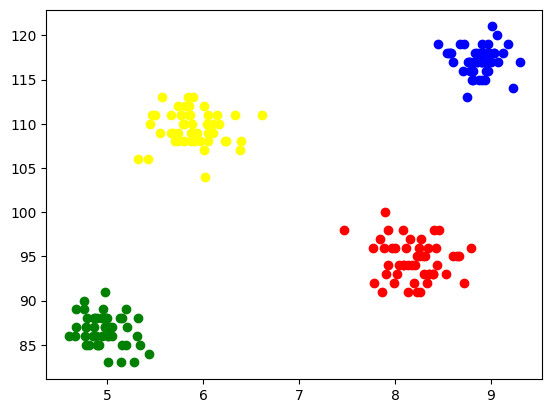

In [ ]:
plt.scatter(X[y_means == 0,0],X[y_means == 0,1],color='blue')
plt.scatter(X[y_means == 1,0],X[y_means == 1,1],color='red')
plt.scatter(X[y_means == 2,0],X[y_means == 2,1],color='green')
plt.scatter(X[y_means == 3,0],X[y_means == 3,1],color='yellow')

# K-Means on 3-D Data

In [ ]:
from sklearn.datasets import make_blobs

centroids = [(-5,-5,5),(5,5,-5),(3.5,-2.5,4),(-2.5,2.5,-4)]
cluster_std = [1,1,1,1]

X,y = make_blobs(n_samples=200,cluster_std=cluster_std,centers=centroids,n_features=3,random_state=1)

In [ ]:
X

array([[ 4.33424548,  3.32580419, -4.17497018],
       [-3.32246719,  3.22171129, -4.625342  ],
       [-6.07296862, -4.13459237,  2.6984613 ],
       [ 6.90465871,  6.1110567 , -4.3409502 ],
       [-2.60839207,  2.95015551, -2.2346649 ],
       [ 5.88490881,  4.12271848, -5.86778722],
       [-4.68484061, -4.15383935,  4.14048406],
       [-1.82542929,  3.96089238, -3.4075272 ],
       [-5.34385368, -4.95640314,  4.37999916],
       [ 4.91549197,  4.70263812, -4.582698  ],
       [-3.80108212, -4.81484358,  4.62471505],
       [ 4.6735005 ,  3.65732421, -3.88561702],
       [-6.23005814, -4.4494625 ,  5.79280687],
       [-3.90232915,  2.95112294, -4.6949209 ],
       [ 3.72744124,  5.31354772, -4.49681519],
       [-3.3088472 ,  3.05743945, -3.81896126],
       [ 2.70273021, -2.21732429,  3.17390257],
       [ 4.06438286, -0.36217193,  3.214466  ],
       [ 4.69268607, -2.73794194,  5.15528789],
       [ 4.1210827 , -1.5438783 ,  3.29415949],
       [-6.61577235, -3.87858229,  5.408

In [ ]:
import plotly.express as px
fig = px.scatter_3d(x=X[:,0], y=X[:,1], z=X[:,2])
fig.show()

In [ ]:
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(X)
    wcss.append(km.inertia_)

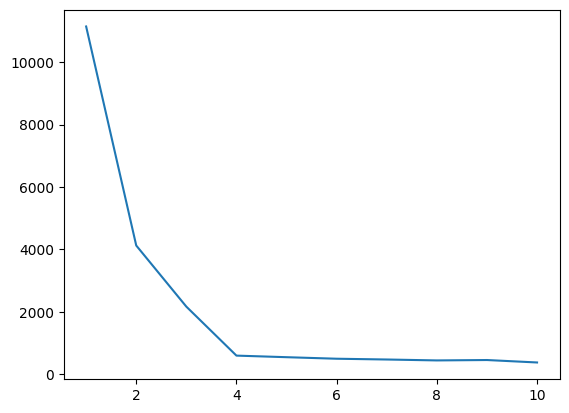

In [ ]:
plt.plot(range(1,11),wcss)

In [ ]:
km = KMeans(n_clusters=4)
y_pred = km.fit_predict(X)

In [ ]:
df = pd.DataFrame()

df['col1'] = X[:,0]
df['col2'] = X[:,1]
df['col3'] = X[:,2]
df['label'] = y_pred

In [ ]:
fig = px.scatter_3d(df,x='col1', y='col2', z='col3',color='label')
fig.show()